# Predicting Stock Market With Machine Learning

In [190]:
import os
import pandas as pd

dataset = dict()

for root, dirs, files in os.walk("Datasets"):
    for file in files:
        if file.endswith(".csv"):
            dataname = file.split('.')[0]
            dataset[dataname] = pd.read_csv(os.path.join(root, file))

feature1 = ['Open', 'High', 'Low', 'Close', 'Volume']
feature2 = ['Open', 'High', 'Low', 'Close', 'Volume', 'SMA_5', 'SMA_10', 'EMA_5', 'EMA_10', 'RSI']

dataset['AppleStock_Year1'].head()

,Date,Close,High,Low,Open,Volume,Target,SMA_5,SMA_10,EMA_5,EMA_10,RSI
0,2024-01-22,192.480438,193.909972,190.862283,190.902001,60133900,193.761063,186.710696,185.520407,188.315401,186.374689,66.056890
1,2024-01-23,193.761063,194.326926,192.420886,193.602237,42355600,193.085999,189.003897,186.475415,190.130622,187.717666,67.679825
2,2024-01-24,193.085999,194.952336,192.927158,193.999308,53631300,192.758408,191.350708,187.404611,191.115747,188.693726,69.508961
3,2024-01-25,192.758408,194.843147,191.706116,193.800777,54822100,191.021118,192.450656,188.196809,191.663301,189.432759,75.267971
4,2024-01-26,191.021118,193.344103,190.544612,192.857675,44594000,190.336151,192.621405,188.874843,191.449240,189.721552,72.231035


# LSTM (Long Short Tern Memory)


In [191]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

stock_target = dataset['AppleStock_Year5']['Target']
price_closes = dataset['AppleStock_Year5'][['Close']]

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(price_closes)

x = []
y = []
window_size = 30

for i in range(window_size, len(scaled_data)):
    x.append(scaled_data[i-window_size:i, 0])
    y.append(scaled_data[i, 0])

x, y = np.array(x), np.array(y)
x = np.reshape(x, (x.shape[0], x.shape[1], 1))

split = int(0.8 * len(x))
x_train, x_test = x[:split], x[split:]
y_train, y_test = y[:split], y[split:]

lstm_model = Sequential()
lstm_model.add(LSTM(units=100, input_shape=(x_train.shape[1], 1)))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(units=50))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(units=1))
lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(x_train, y_train, epochs=200, batch_size=16)

lstm_predictions = lstm_model.predict(x_test)
lstm_predictions = scaler.inverse_transform(lstm_predictions)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

Epoch 1/200


/home/g30tr1x/miniforge3/envs/MLPythonLow/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0346
Epoch 2/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0033
Epoch 3/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0031
Epoch 4/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0021
Epoch 5/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0023
Epoch 6/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0020
Epoch 7/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0019
Epoch 8/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0017
Epoch 9/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0016
Epoch 10/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0017
Epoch 11/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0017
Epoch 12/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0015
Epoch 13/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0015
Epoch 14/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0015
Epoch 15/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0016
Epoch 16/20

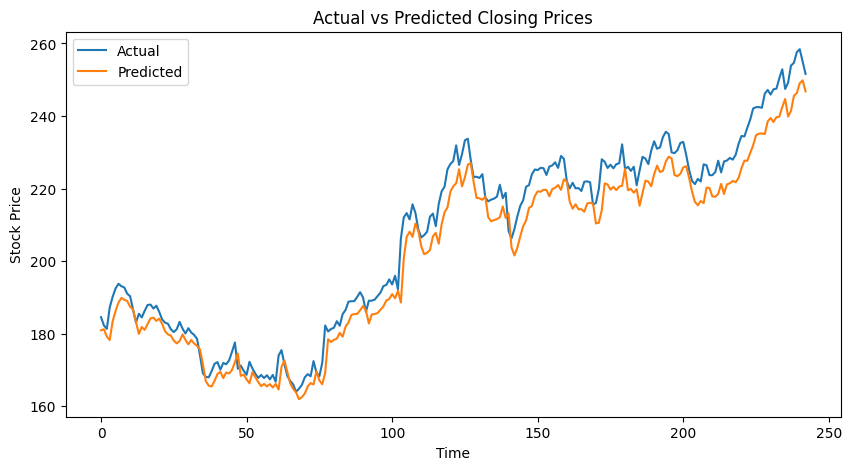

In [192]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(y_test_actual, label='Actual')
plt.plot(lstm_predictions, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.title("Actual vs Predicted Closing Prices")
plt.show()

In [193]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test_actual, lstm_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_actual, lstm_predictions)

print("LSTM Model Performance:")
print(f"Mean Squared Error = {mse:.2f}")
print(f"Root Mean Squared Error = {rmse:.2f}")
print(f"R2 Score = {r2:.2f}")

LSTM Model Performance:
Mean Squared Error = 37.52
Root Mean Squared Error = 6.13
R2 Score = 0.94


## Comparing a with 5 year data

In [194]:
stock_target = dataset['AppleStock_Year1']['Target']
price_closes = dataset['AppleStock_Year1'][['Close']]

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(price_closes)

x = []
y = []
window_size = 30

for i in range(window_size, len(scaled_data)):
    x.append(scaled_data[i-window_size:i, 0])
    y.append(scaled_data[i, 0])

x, y = np.array(x), np.array(y)
x = np.reshape(x, (x.shape[0], x.shape[1], 1))

split = int(0.8 * len(x))
x_train, x_test = x[:split], x[split:]
y_train, y_test = y[:split], y[split:]

lstm_predictions = lstm_model.predict(x_test)
lstm_predictions = scaler.inverse_transform(lstm_predictions)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


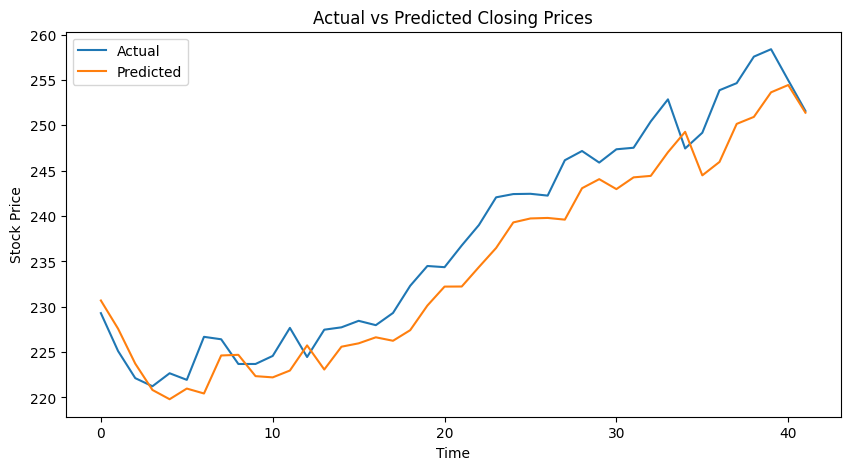

In [195]:
plt.figure(figsize=(10, 5))
plt.plot(y_test_actual, label='Actual')
plt.plot(lstm_predictions, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.title("Actual vs Predicted Closing Prices")
plt.show()

In [196]:
mse = mean_squared_error(y_test_actual, lstm_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_actual, lstm_predictions)

print("LSTM Model Performance:")
print(f"Mean Squared Error = {mse:.2f}")
print(f"Root Mean Squared Error = {rmse:.2f}")
print(f"R2 Score = {r2:.2f}")

LSTM Model Performance:
Mean Squared Error = 14.71
Root Mean Squared Error = 3.84
R2 Score = 0.89


# Testing with other datasets

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


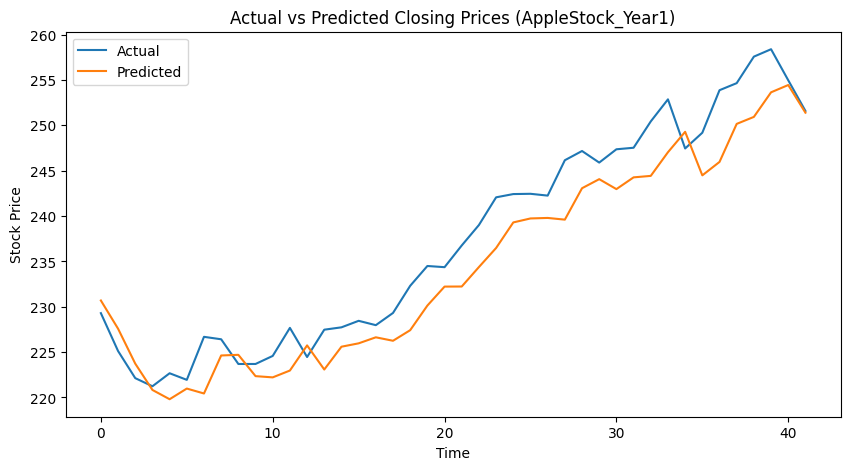

LSTM Model Performance (AppleStock_Year1):
Mean Squared Error = 14.71
Root Mean Squared Error = 3.84
R2 Score = 0.89
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


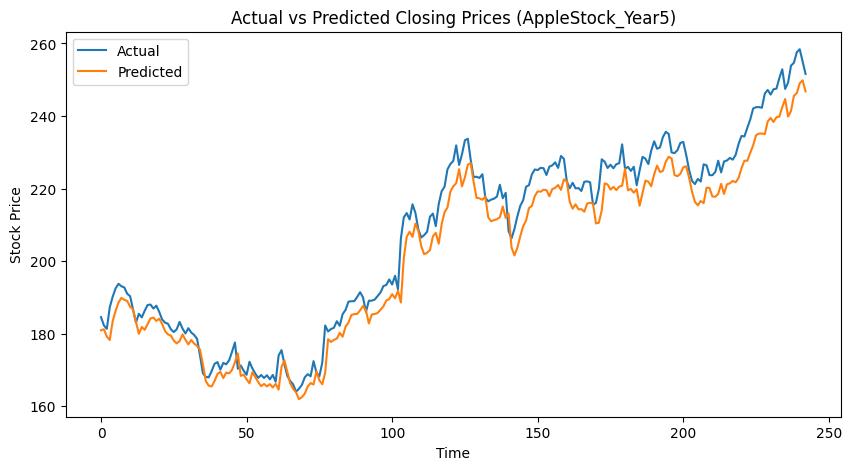

LSTM Model Performance (AppleStock_Year5):
Mean Squared Error = 37.52
Root Mean Squared Error = 6.13
R2 Score = 0.94
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


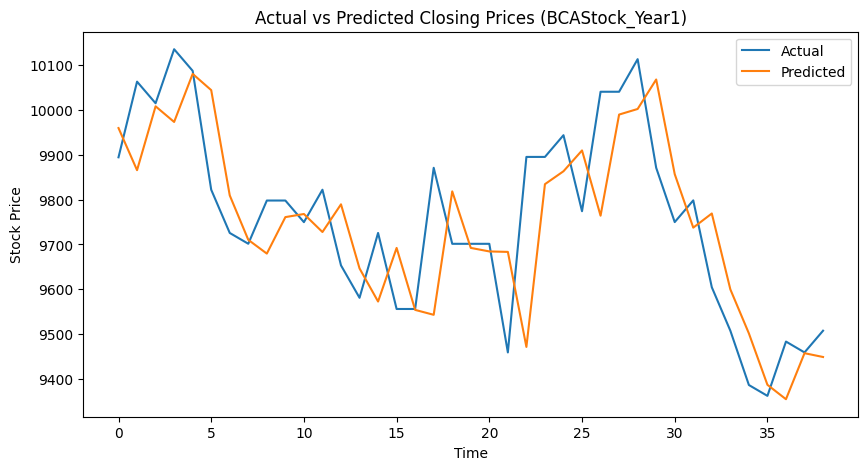

LSTM Model Performance (BCAStock_Year1):
Mean Squared Error = 20820.93
Root Mean Squared Error = 144.29
R2 Score = 0.51
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


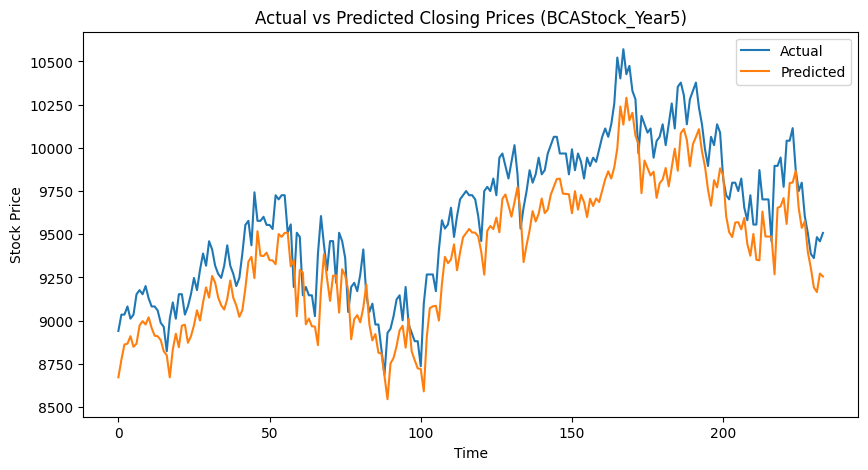

LSTM Model Performance (BCAStock_Year5):
Mean Squared Error = 62305.22
Root Mean Squared Error = 249.61
R2 Score = 0.64
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


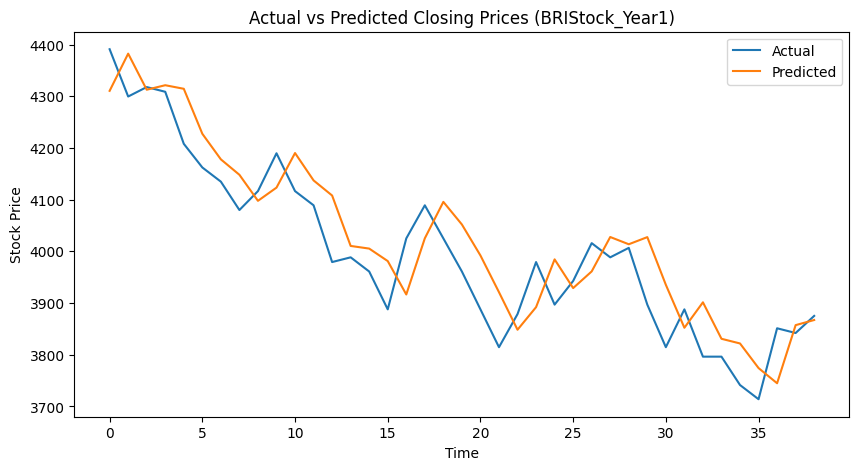

LSTM Model Performance (BRIStock_Year1):
Mean Squared Error = 5510.30
Root Mean Squared Error = 74.23
R2 Score = 0.80
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


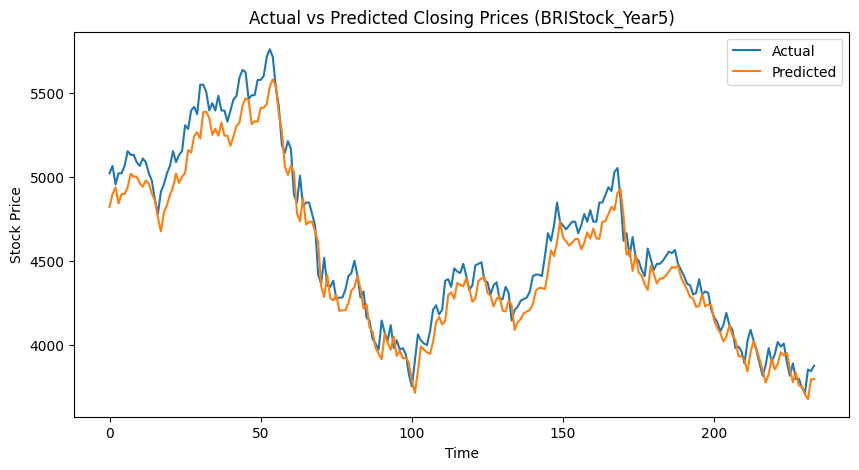

LSTM Model Performance (BRIStock_Year5):
Mean Squared Error = 15912.97
Root Mean Squared Error = 126.15
R2 Score = 0.94
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


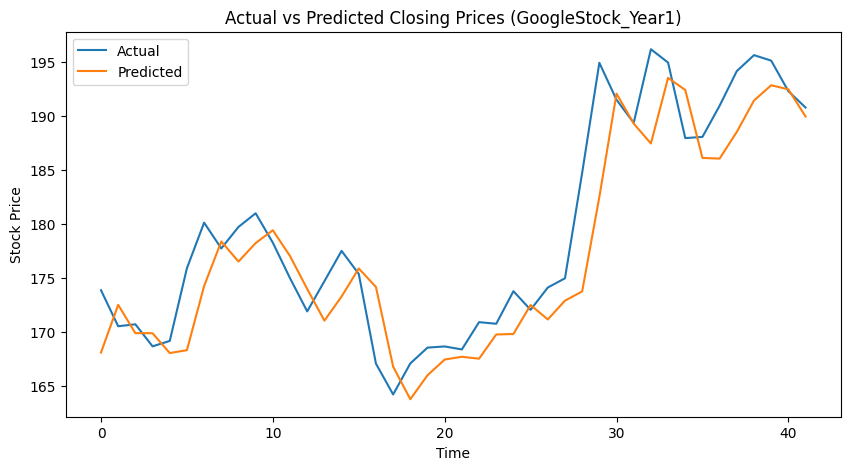

LSTM Model Performance (GoogleStock_Year1):
Mean Squared Error = 18.30
Root Mean Squared Error = 4.28
R2 Score = 0.81
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


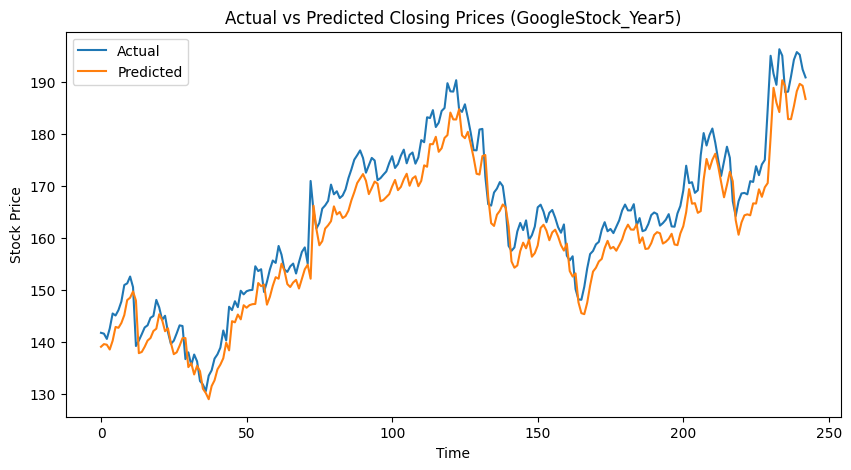

LSTM Model Performance (GoogleStock_Year5):
Mean Squared Error = 24.09
Root Mean Squared Error = 4.91
R2 Score = 0.89
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


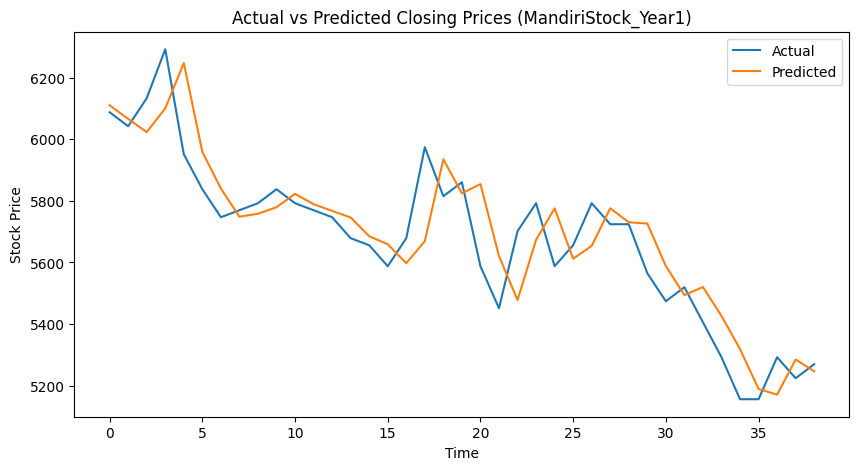

LSTM Model Performance (MandiriStock_Year1):
Mean Squared Error = 16241.21
Root Mean Squared Error = 127.44
R2 Score = 0.76
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


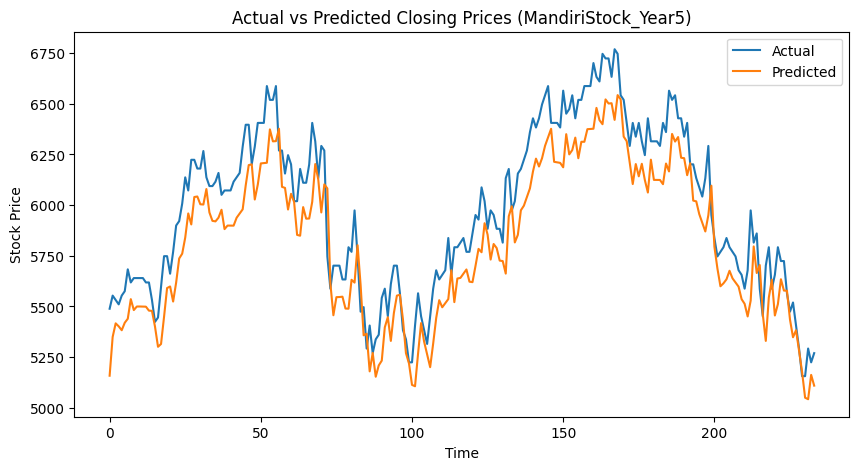

LSTM Model Performance (MandiriStock_Year5):
Mean Squared Error = 40685.32
Root Mean Squared Error = 201.71
R2 Score = 0.75
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


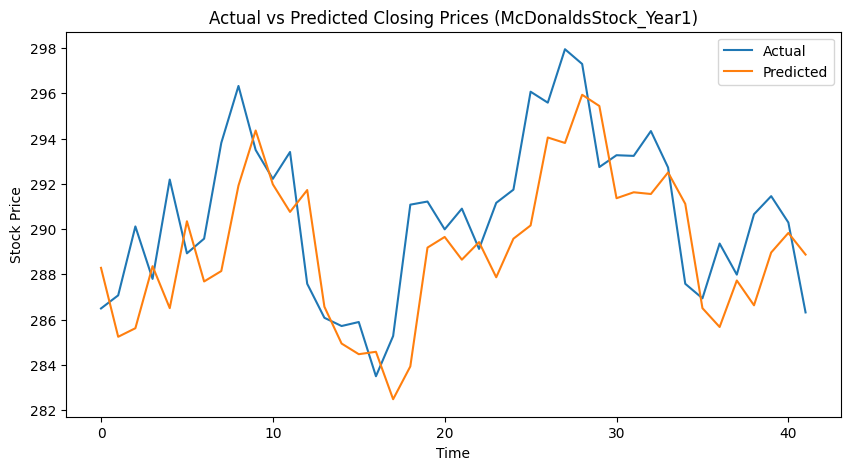

LSTM Model Performance (McDonaldsStock_Year1):
Mean Squared Error = 8.64
Root Mean Squared Error = 2.94
R2 Score = 0.28
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


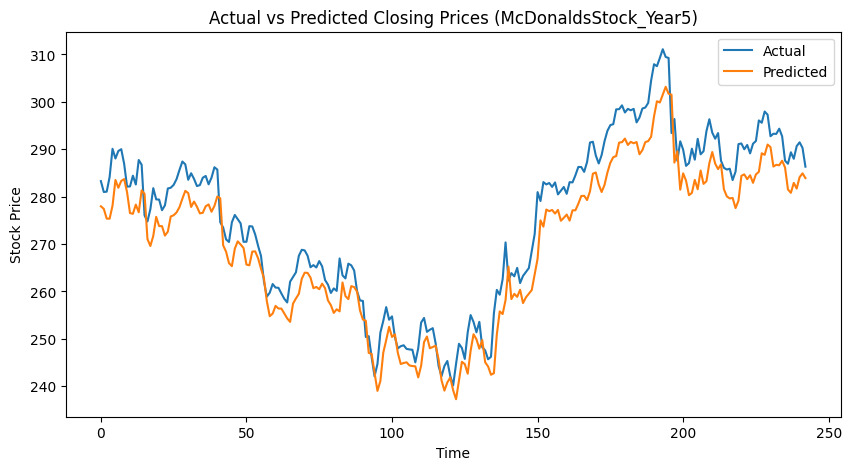

LSTM Model Performance (McDonaldsStock_Year5):
Mean Squared Error = 39.30
Root Mean Squared Error = 6.27
R2 Score = 0.87
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


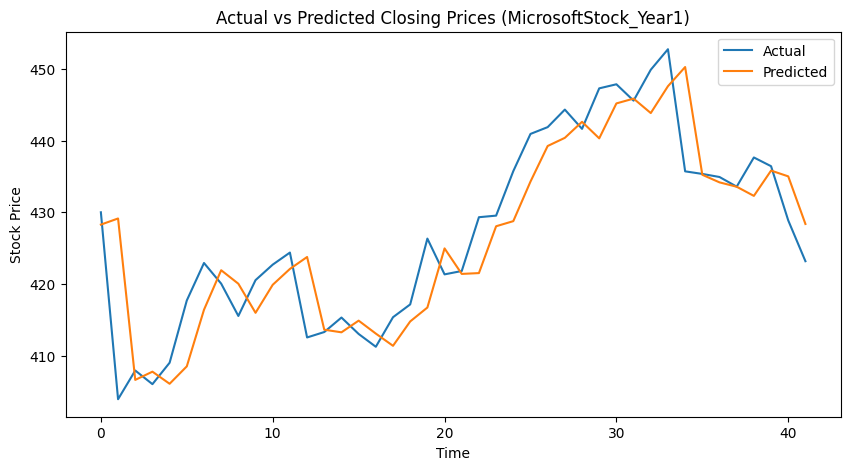

LSTM Model Performance (MicrosoftStock_Year1):
Mean Squared Error = 40.46
Root Mean Squared Error = 6.36
R2 Score = 0.76
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


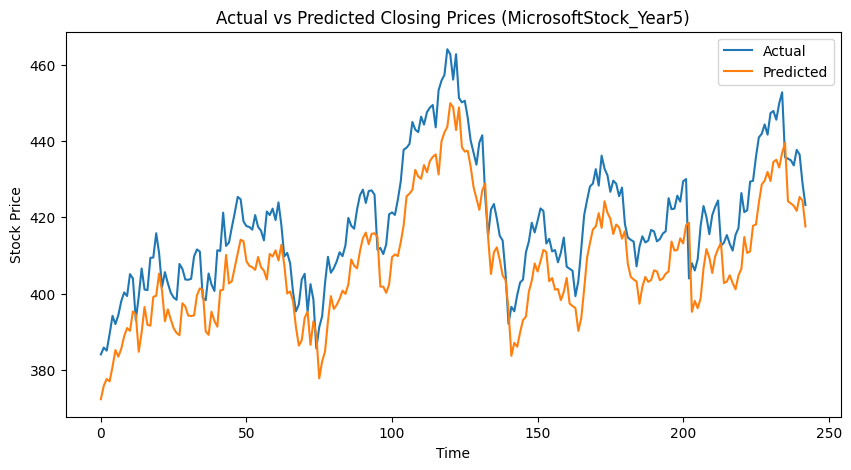

LSTM Model Performance (MicrosoftStock_Year5):
Mean Squared Error = 144.17
Root Mean Squared Error = 12.01
R2 Score = 0.45
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


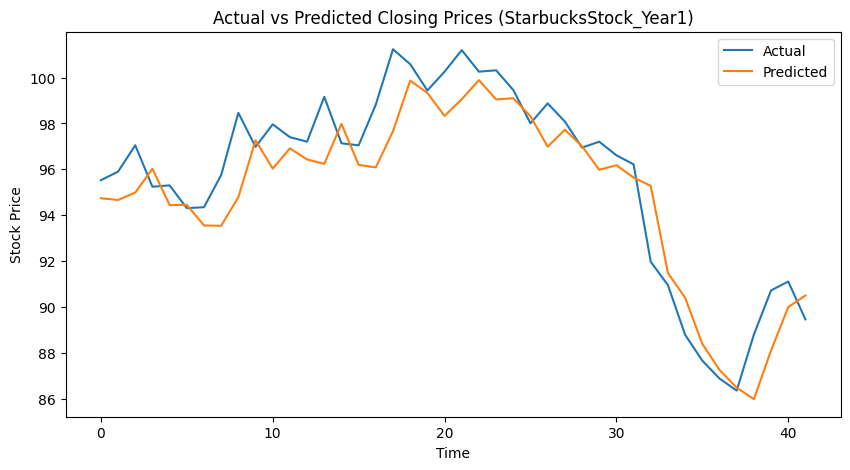

LSTM Model Performance (StarbucksStock_Year1):
Mean Squared Error = 2.61
Root Mean Squared Error = 1.62
R2 Score = 0.84
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


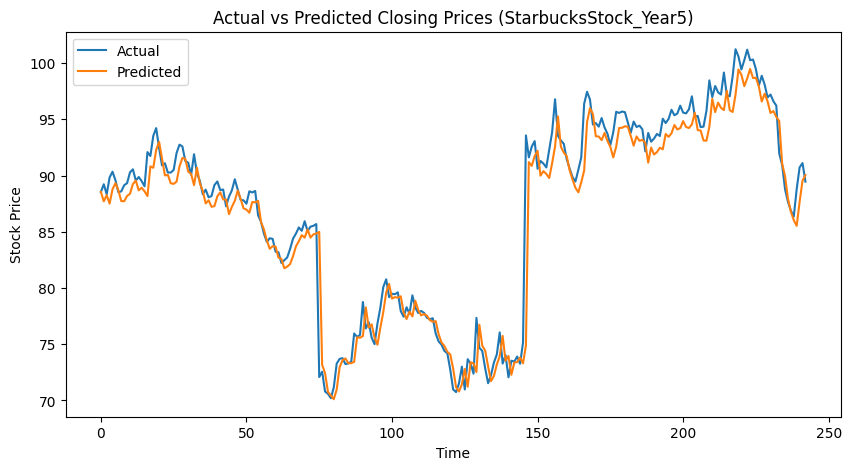

LSTM Model Performance (StarbucksStock_Year5):
Mean Squared Error = 4.42
Root Mean Squared Error = 2.10
R2 Score = 0.94
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


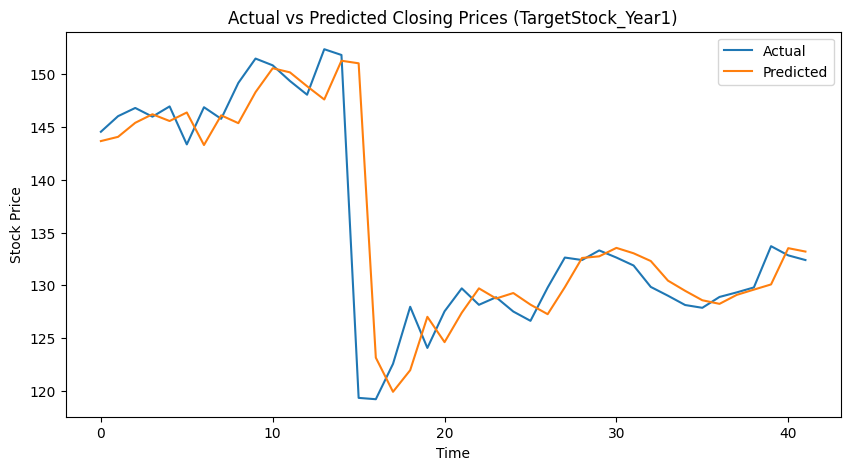

LSTM Model Performance (TargetStock_Year1):
Mean Squared Error = 28.98
Root Mean Squared Error = 5.38
R2 Score = 0.70
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


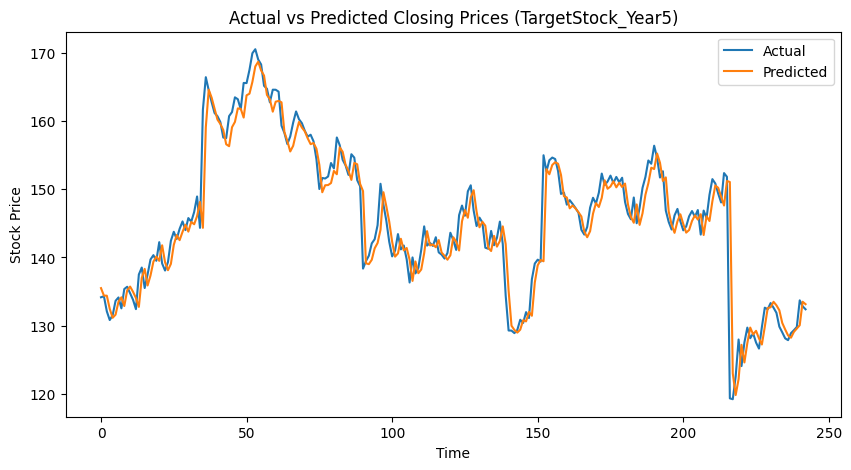

LSTM Model Performance (TargetStock_Year5):
Mean Squared Error = 12.09
Root Mean Squared Error = 3.48
R2 Score = 0.89


In [197]:
for name, data in dataset.items():
    stock_target = dataset[name]['Target']
    price_closes = dataset[name][['Close']]

    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(price_closes)

    x = []
    y = []
    window_size = 30

    for i in range(window_size, len(scaled_data)):
        x.append(scaled_data[i-window_size:i, 0])
        y.append(scaled_data[i, 0])

    x, y = np.array(x), np.array(y)
    x = np.reshape(x, (x.shape[0], x.shape[1], 1))

    split = int(0.8 * len(x))
    x_train, x_test = x[:split], x[split:]
    y_train, y_test = y[:split], y[split:]

    lstm_predictions = lstm_model.predict(x_test)
    lstm_predictions = scaler.inverse_transform(lstm_predictions)
    y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

    plt.figure(figsize=(10, 5))
    plt.plot(y_test_actual, label='Actual')
    plt.plot(lstm_predictions, label='Predicted')
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.title(f"Actual vs Predicted Closing Prices ({name})")
    plt.show()

    mse = mean_squared_error(y_test_actual, lstm_predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_actual, lstm_predictions)

    print(f"LSTM Model Performance ({name}):")
    print(f"Mean Squared Error = {mse:.2f}")
    print(f"Root Mean Squared Error = {rmse:.2f}")
    print(f"R2 Score = {r2:.2f}")

